### Universidad del Valle de Guatemala
### (CC3074) Minería de Datos
### Laboratorio 03 (SVM)
### Marco Orozco (20857) y Santiago Taracena (20017)

Para comenzar, necesitamos importar algunas librerías importantes y necesarias para el desarrollo del laboratorio.

In [2]:
# Librerías importantes para el desarrollo del laboratorio.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Después de importar estas librerías, necesitamos leer el archivo con datos. Esta acción la podemos ejecutar llamando a la función read_csv que viene con pandas.

In [3]:
# Carga del dataset proporcionado.
data = pd.read_csv("./data/wine_fraud.csv")

#### 1.1) Identifica el tipo de archivo .data y la forma de leerlo.

Un archivo .data puede ser de muchos tipos diferentes, por lo que la forma de leerlo en Python dependerá del tipo de datos que contenga el archivo .data.

Si se trata de un archivo de datos en bruto sin estructura definida, puede ser necesario leerlo como un archivo binario utilizando la función open de Python y luego leer el contenido del archivo utilizando métodos como read o readlines.

Si el archivo .data contiene datos estructurados, como una matriz NumPy o un objeto Pandas DataFrame, es posible que sea necesario utilizar bibliotecas específicas para leer el archivo en Python. Por ejemplo, para leer un archivo de matriz NumPy, se puede utilizar la función load de NumPy.

Finalmente, para leer un archivo Pandas DataFrame, se puede utilizar la función read_csv o read_pickle de Pandas, dependiendo del formato en que se haya guardado el archivo.

En resumen, la forma de leer un archivo .data en Python dependerá del tipo de datos que contenga el archivo. Si no hay una estructura definida en el archivo, puede leerse como un archivo binario utilizando métodos estándar de Python como open y read. Si hay una estructura definida, es posible que necesite utilizar bibliotecas específicas para leer el archivo en Python.

#### 1.2) Estudia las variables cuantitativas mediante técnicas de estadística descriptiva.

En primer lugar, resulta considerablemente conveniente poder tener aisladas nuestras variables cuantitativas de las variables cualitativas, por lo que procederemos a seleccionar únicamente las columnas cuantitativas (pese a que próximamente codifiquemos las cualitativas).

In [5]:
# Columnas cuantitativas del dataset.
quantitative_columns = data.iloc[:, 0:-2]
quantitative_columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


También podemos asegurarnos de que todas las columnas seleccionadas sean numéricas con la propiedad dtypes del dataset obtenido.

In [7]:
# Tipos de datos de las columnas cuantitativas.
quantitative_columns.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

Posteriormente podemos analizar los datos cuantitativos llamando a la función describe del dataset que obtuvimos luego de eliminar las últimas dos columnas.

In [6]:
# Descripción de las columnas del dataset.
quantitative_columns.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


#### 1.3) Hace gráficos exploratorios como histogramas, diagramas de cajas y bigotes, gráficos de dispersión que ayudan a explicar los datos.

En esta sección se encuentran algunos gráficos exploratorios de los datos proporcionados que consideramos útiles.

<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

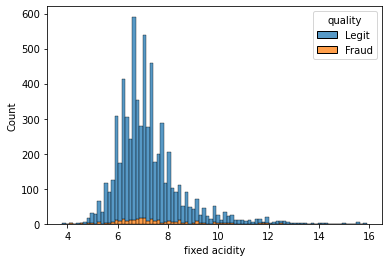

In [10]:
sns.histplot(x="fixed acidity", hue="quality", multiple="stack", data=data)

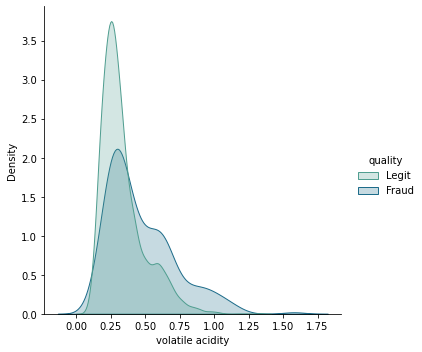

In [11]:
sns.displot(data=data, x="volatile acidity", hue="quality", kind="kde", fill=True, common_norm=False, palette="crest")

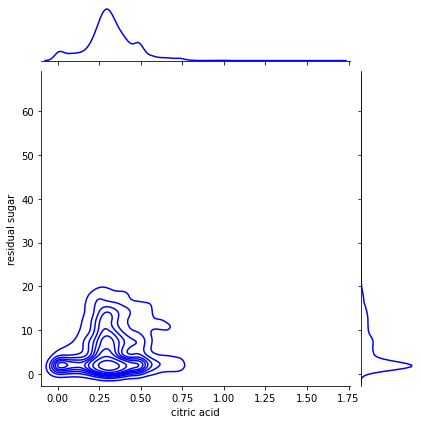

In [12]:
sns.jointplot(x="citric acid", y="residual sugar", data=data, kind="kde", color="blue")

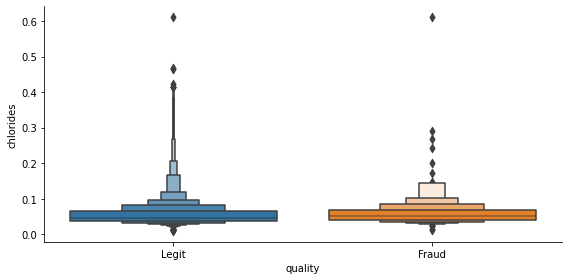

In [14]:
sns.catplot(x="quality", y="chlorides", data=data, kind="boxen", height=4, aspect=2)

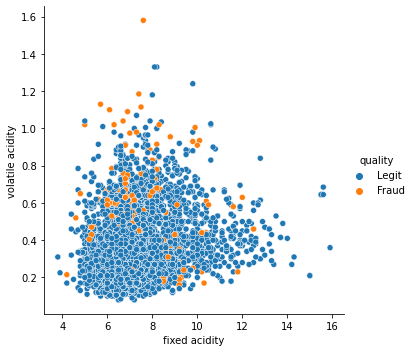

In [16]:
sns.relplot(x="fixed acidity", y="volatile acidity", hue="quality", data=data)

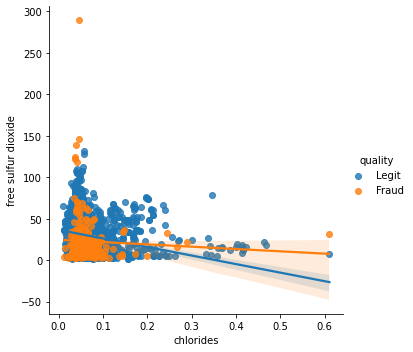

In [17]:
sns.lmplot(x="chlorides", y="free sulfur dioxide", hue="quality", data=data)

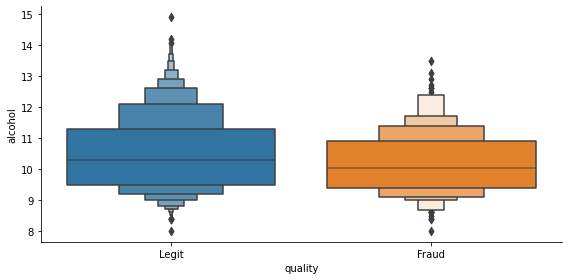

In [19]:
sns.catplot(x="quality", y="alcohol", data=data, kind="boxen", height=4, aspect=2)

<AxesSubplot:xlabel='pH', ylabel='Count'>

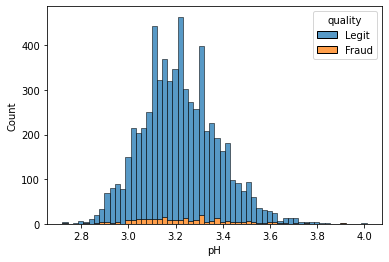

In [20]:
sns.histplot(x="pH", hue="quality", multiple="stack", data=data)

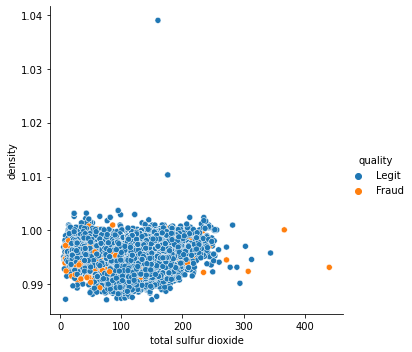

In [21]:
sns.relplot(x="total sulfur dioxide", y="density", hue="quality", data=data)

#### 1.4) Analiza las correlaciones entre las variables, trata de explicar los outliers (datos atípicos) y toma decisiones acertadas ante la presencia de valores faltantes.

In [23]:
# Gráfico de correlación de variables del dataset.
sns.pairplot(data=data, hue="quality")